**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Creating DataFrame**

In [ ]:
df = pd.read_csv('/content/Restaurant_Reviews.tsv', sep = '\t')

In [ ]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
df['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

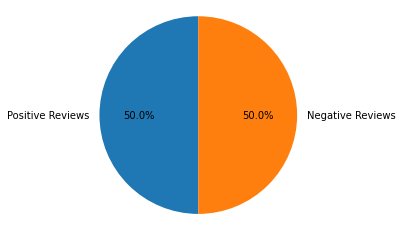

In [ ]:
labels = 'Positive Reviews', 'Negative Reviews'
sizes = [50,50]
fig1 ,ax1 = plt.subplots()
ax1.pie(sizes,labels = labels,autopct='%1.1f%%', startangle = 90)
ax1.axis('equal')
plt.show() 

In [ ]:
x = df['Review'].values
y = df['Liked'].values

In [ ]:
x.shape

(1000,)

In [ ]:
x[0]

'Wow... Loved this place.'

# Cleaning the Words

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 1000):
  review = re.sub('[^a-zA-Z]', ' ', x[i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
corpus[2]

'not tasti textur nasti'

**Splitting the dataset into training and test set**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(corpus, y, random_state = 0)

**Creating Bag Of Words Model**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')
x_train_vect = cv.fit_transform(x_train)
x_test_vect = cv.transform(x_test)

# SVC and COUNTVECTORIZER seperately

In [ ]:
from sklearn.svm import SVC
model1 = SVC()
model1.fit(x_train_vect, y_train)

SVC()

In [ ]:
y_pred1 = model1.predict(x_test_vect)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred1)

0.748

# Using Pipeline for svc and countvectorizer

In [ ]:
from sklearn.pipeline import make_pipeline
model2 = make_pipeline(CountVectorizer(),SVC())
model2.fit(x_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()), ('svc', SVC())])

In [ ]:
y_pred2 = model2.predict(x_test)

In [ ]:
x_test

['present food aw',
 'worst food servic',
 'never dine place',
 'guess mayb went night disgrac',
 'sushi lover avoid place mean',
 'ambianc much better',
 'hole wall great mexican street taco friendli staff',
 'food bad enough enjoy deal world worst annoy drunk peopl',
 'never ever go back',
 'atmospher fun',
 'pancak also realli good pretti larg',
 'tapa dish delici',
 'chain fan beat place easili',
 'everyon attent provid excel custom servic',
 'staff also friendli effici',
 'love friendli server great food wonder imagin menu',
 'disappoint dinner went elsewher dessert',
 'perhap caught night judg review not inspir go back',
 'disgust pretti sure human hair',
 'sweet potato fri good season well',
 'like final blow',
 'place jewel la vega exactli hope find nearli ten year live',
 'fantast food',
 'order toast english muffin came untoast',
 'order albondiga soup warm tast like tomato soup frozen meatbal',
 'staff super nice quick even crazi crowd downtown juri lawyer court staff',
 'th

In [ ]:
y_pred2

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0])

In [ ]:
accuracy_score(y_pred2,y_test)

0.756

# Naive Bayes and CountVectorizer

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model3 = MultinomialNB()

In [ ]:
model3.fit(x_train_vect,y_train)

MultinomialNB()

In [ ]:
y_pred3 = model3.predict(x_test_vect)

In [ ]:
y_pred3

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0])

In [ ]:
accuracy_score(y_pred3,y_test)

0.764

# Using Pipeline for Naive Bayes and CountVectorizer



In [ ]:
model4 = make_pipeline(CountVectorizer(),MultinomialNB())

In [ ]:
model4.fit(x_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [ ]:
y_pred4 = model4.predict(x_test)

In [ ]:
y_pred4

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0])

In [ ]:
accuracy_score(y_pred4,y_test)

0.768

In [ ]:
#Pipe line with naive bayes and count vectorizer is most accurate so let us predict with that that model

In [ ]:
import joblib

In [ ]:
joblib.dump(model4,'Sentimental-analysis-model')

['Sentimental-analysis-model']

In [ ]:
model_load = joblib.load('Sentimental-analysis-model')

In [ ]:
model_load.predict(['Worst'])

array([0])